In [1]:
using InMemoryDatasets, StatisticalGraphics, Chain

`Polygon` can be used to draw polygons. Each polygon is represented by xy-coordinates and its id. `sgplot` produces a seperate polygon for each id.

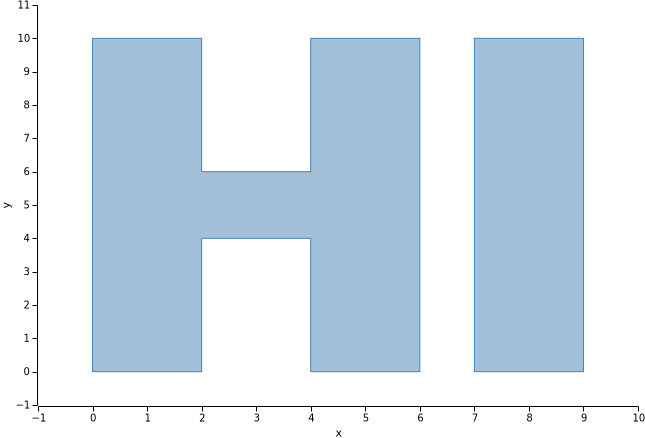

In [2]:
ds=Dataset(
            x=[0,0,2,2,4,4,6,6,4,4,2,2,7,7,9,9],
            y=[0,10,10,6,6,10,10,0,0,4,4,0,0,10,10,0],
            id=[fill(1,12);fill(2,4)]
        )

sgplot(ds,
        Polygon(x=:x, y=:y, id=:id, opacity=0.5),
        xaxis=Axis(padding=10),
        yaxis=Axis(padding=10)
)

Users can pass `colorresponse` or `group` for colorful drawings

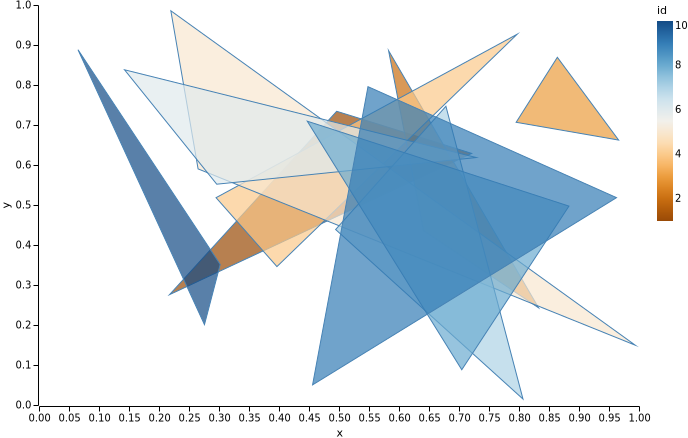

In [3]:
ds = Dataset(id = repeat(1:10, 3), x = rand(30), y=rand(30))

sgplot(ds, Polygon(x=:x, y=:y, id=:id, colorresponse=:id, opacity=0.7))

`Polygon` can be customised by other keywords,

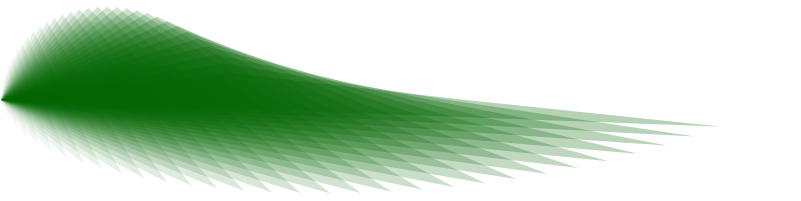

In [4]:
triangle(a, mul=[1,1,1]) = [(0.0, 0.0) .*
                            mul[1], (sqrt(2 * a^2 - 2 * a^2 * cos(a)), 0.0) .* mul[2],
                            ((a^2 - a^2 * cos(a)) / sqrt(
                            2 * a^2 - 2 * a^2 * cos(a)),
                            (a^2 * sin(a)) / sqrt(2 * a^2 - 2 * a^2 * cos(a))) .* mul[3]
                            ]

ds = Dataset(x=range(0.01, 3, step=0.091))

@chain ds begin
  modify!(
            :x => byrow(x->x/10) => :opacity,
            :x => byrow(triangle) => :t1,
            :x => byrow(x->triangle(x, [(1,-1), (1,-1), (3.1,-1)])) => :t2
          )

  flatten!(r"^t")

  modify!(
            :t1 => splitter => [:x1, :y1],
            :t2 => splitter => [:x2, :y2]
          )
  sgplot(
          [
            Polygon(x="x$i", y="y$i",
                    id=:x,
                    opacityresponse=:opacity,
                    color=:darkgreen,
                    outline=false)
            for i in 1:2
          ],
          height=200,
          width=800,
          xaxis=Axis(show=false),
          yaxis=Axis(show=false)
        )
end

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*